In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN','AAPL','FB']

ticker          AAPL      AMZN        FB
date                                    
2021-09-20       NaN       NaN  0.142633
2021-09-21  0.130221  0.162686  0.181304
2021-09-22 -0.019160  0.257165 -0.046684
2021-09-23 -0.046783  0.241035  0.011128
2021-09-24  0.260692  0.317474  0.157429
2021-09-25  0.110100  0.247436 -0.236833


<Figure size 720x576 with 0 Axes>

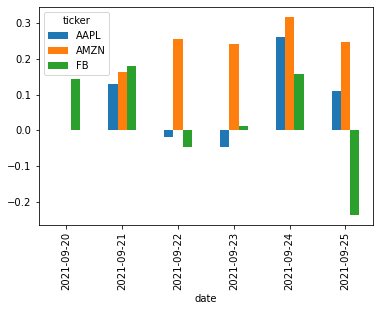

In [3]:
news_tables = {}

for ticker in tickers:
    url = finviz_url + ticker
    
    req = Request(url=url, headers ={'user-agent':'my-app'})
    response = urlopen(req)
    html = BeautifulSoup(response,'html')
    news_table = html.find(id='news-table')
    news_tables[ticker]=news_table
    
p_data=[]

for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        headline = row.a.get_text()
        date = row.td.text.split(' ')
        
        if len(date)==1:
            time = date[0]
        else:
            date = date [0]
            time = date [1]
        p_data.append([ticker,date,time,headline])

df = pd.DataFrame(p_data, columns =['ticker','date','time','headline'])
v = SentimentIntensityAnalyzer()

f = lambda headline: v.polarity_scores(headline)['compound']
df['compound'] = df['headline'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

mean_df = df.groupby(['ticker','date']).mean()
mean_df = mean_df.unstack()
mean_df=mean_df.xs('compound', axis = 'columns').transpose()
mean_df.plot(kind='bar')
print(mean_df)
